In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.utils import resample
from sklearn import set_config
import warnings
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')
set_config('diagram')

In [134]:
#Reading the data
census_df = pd.read_csv(filepath_or_buffer='adult.csv')
display(census_df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,<=50K
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32559,22.0,Private,310152.0,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
32560,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32561,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32562,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K


In [135]:
#Datatypes and statistical infor of data
display(census_df.info())
print('\n')
display(census_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32564 entries, 0 to 32563
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  float64
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital.gain    32561 non-null  float64
 11  capital.loss    32561 non-null  float64
 12  hours.per.week  32561 non-null  float64
 13  native.country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


None

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [136]:
#Checking for missing values
missing_values = census_df.isnull().sum()
print('The missing values columns: \n{}'.format(missing_values))

census_df.dropna(inplace=True)

print('\n\nThe missing value columns: \n{}'.format(census_df.isnull().sum()))

The missing values columns: 
age               3
workclass         3
fnlwgt            3
education         3
education.num     3
marital.status    3
occupation        3
relationship      3
race              3
sex               3
capital.gain      3
capital.loss      3
hours.per.week    3
native.country    3
income            3
dtype: int64


The missing value columns: 
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [137]:
# Checking if the Target Variable is balanced or not
number_classes = census_df['income'].value_counts()
print('The number of different classes \n{}'.format(number_classes))

The number of different classes 
<=50K    24720
>50K      7841
Name: income, dtype: int64


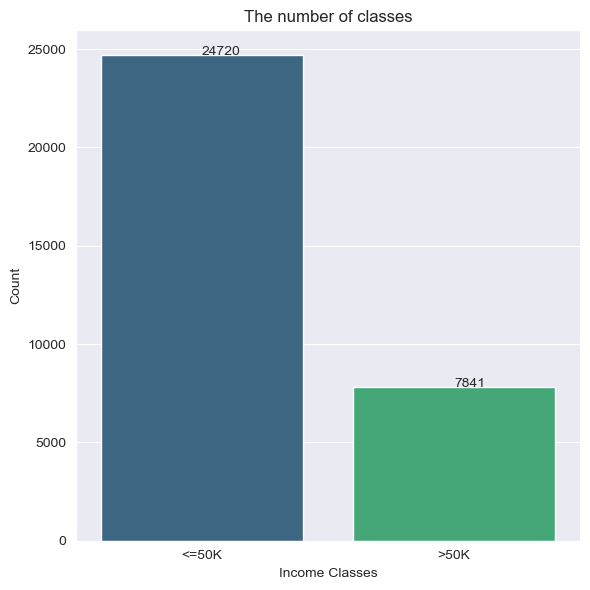

In [138]:
#Visualizing the Target Classes
plt.figure(figsize=(6, 6))
sns.countplot(data=census_df, x='income', palette='viridis')

ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '%d' % int(p.get_height()))

plt.title('The number of classes')
plt.xlabel('Income Classes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

From the number of class labels for each income categories suggests that the data is imbalanced.

In [139]:
# plt.figure(figsize=(12, 12))
# sns.pairplot(data=census_df, palette='viridis',hue='income')

In [140]:
# Balancing the Target Classes
census_df_less50K = census_df[census_df['income'] == '<=50K']
census_df_greater50K = census_df[census_df['income'] == '>50K']

print('The number of counts where income is lesser than 50K \n{}'.format(census_df_less50K['income'].value_counts()))
print('\nThe number of counts where income is greater than 50K \n{}'.format(census_df_greater50K['income'].value_counts()))

df_undersampling_majority = resample(census_df_less50K,
                                     replace=False,
                                     random_state=42,
                                     n_samples=len(census_df_greater50K['income']))

balanced_census_df = pd.concat([census_df_greater50K, df_undersampling_majority])

print('\nThe number of class labels after under sampling \n{}\n'.format(balanced_census_df['income'].value_counts()))

encoding = LabelEncoder()
balanced_census_df['income'] = encoding.fit_transform(balanced_census_df['income'])

for cls,label in zip(encoding.classes_,encoding.transform(encoding.classes_)):
    print('The classes {} and the corresponding encoding {}'.format(cls,label))

print('\n')
display(balanced_census_df)

The number of counts where income is lesser than 50K 
<=50K    24720
Name: income, dtype: int64

The number of counts where income is greater than 50K 
>50K    7841
Name: income, dtype: int64

The number of class labels after under sampling 
>50K     7841
<=50K    7841
Name: income, dtype: int64

The classes <=50K and the corresponding encoding 0
The classes >50K and the corresponding encoding 1




,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74.0,State-gov,88638.0,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0.0,3683.0,20.0,United-States,1
9,41.0,Private,70037.0,Some-college,10.0,Never-married,Craft-repair,Unmarried,White,Male,0.0,3004.0,60.0,?,1
10,45.0,Private,172274.0,Doctorate,16.0,Divorced,Prof-specialty,Unmarried,Black,Female,0.0,3004.0,35.0,United-States,1
11,38.0,Self-emp-not-inc,164526.0,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,2824.0,45.0,United-States,1
15,52.0,Private,129177.0,Bachelors,13.0,Widowed,Other-service,Not-in-family,White,Female,0.0,2824.0,20.0,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22899,33.0,Private,221324.0,Assoc-voc,11.0,Never-married,Machine-op-inspct,Unmarried,Black,Female,0.0,0.0,40.0,United-States,0
9349,21.0,Private,192572.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,45.0,United-States,0
20889,19.0,Private,136306.0,11th,7.0,Never-married,Farming-fishing,Own-child,White,Male,0.0,0.0,24.0,United-States,0
12655,27.0,Private,212041.0,HS-grad,9.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,0


In [141]:
numerical_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex',
                       'native.country']

num_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='median', fill_value='missing')),
        ('standard_scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('label_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
        ('impute', SimpleImputer(strategy='most_frequent'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_pipeline, numerical_columns),
        ('categorical', cat_pipeline, categorical_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='median')),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education.num',
                                  'capital.gain', 'capital.loss',
                                  'hours.per.week']),
                                ('categorical',
                                 Pipeline(steps=[('label_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['workclass', 'education', 'marital.status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native.country'])])

In [142]:
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', SVC())
    ]
)

parameter_grid = [
    {
        'model': [SVC()],
        'model__C': [0.2, 0.5, 1.0],
        'model__kernel': ['linear', 'poly', 'rbf'],
        'model__degree': [2, 3]
    },

    {
        'model': [LinearSVC()],
        'model__penalty': ['l1', 'l2']
    },

    {
        'model': [DecisionTreeClassifier()]
    },

    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [100, 500, 1000],
        'model__criterion': ['gini', 'entropy']
    },

    {
        'model': [XGBClassifier(tree_method = 'gpu_hist')],
        'model__n_estimators': [100, 500, 1000],
        'model__max_depth': [3, 5, 10],
        'model__learning_rate': [0.01, 0.1, 0.05],
    }
]

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('model', SVC())])

In [143]:
X = balanced_census_df.drop(columns='income', axis=1)
Y = balanced_census_df['income']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
print('The shape of X_train after the split: {}'.format(X_train.shape))
print('The shape of Y_train after the split: {}'.format(Y_train.shape))
print('\n\nThe shape of X_test after the split: {}'.format(X_test.shape))
print('The shape of Y_test after the split: {}'.format(Y_test.shape))

The shape of X_train after the split: (12545, 14)
The shape of Y_train after the split: (12545,)


The shape of X_test after the split: (3137, 14)
The shape of Y_test after the split: (3137,)


In [144]:
display(X_train)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
30560,34.0,Private,193285.0,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States
15230,20.0,Private,299399.0,Some-college,10.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,20.0,United-States
32258,22.0,Local-gov,164775.0,5th-6th,3.0,Never-married,Handlers-cleaners,Other-relative,White,Male,0.0,0.0,40.0,Guatemala
23792,51.0,Private,355954.0,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,60.0,United-States
5225,40.0,Private,214010.0,Bachelors,13.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,37.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,41.0,Private,156566.0,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1117,25.0,Local-gov,190107.0,HS-grad,9.0,Never-married,Farming-fishing,Own-child,White,Male,0.0,1719.0,16.0,United-States
19724,44.0,?,109912.0,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0.0,0.0,16.0,United-States
1609,42.0,Local-gov,175642.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Female,99999.0,0.0,40.0,United-States


In [145]:
grid_search = GridSearchCV(estimator=pipe, param_grid=parameter_grid, cv=5, verbose=2, scoring='f1', n_jobs=-1)

In [146]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='median')),
                                                                                         ('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education.num',
                                                                          'capital.gain',
                                                                          'capital.loss',
                                                                          'hours.per.week']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('label_encod...
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=5, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  predictor=None,
                                                  random_state=None, ...)],
                          'model__learning_rate': [0.01, 0.1],
                          'model__max_depth': [3, 5, 10],
                          'model__n_estimators': [100, 500, 1000]}],
             scoring='f1', verbose=2)

In [147]:
grid_results = pd.DataFrame(grid_search.cv_results_)
display(grid_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__degree,param_model__kernel,param_model__penalty,param_model__criterion,...,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,21.657514,0.423539,2.882481,0.176930,SVC(),0.2,2,linear,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.2, 'model__degr...",0.832708,0.830374,0.819648,0.818696,0.824981,0.825281,0.005591,36
1,22.278735,0.635130,3.120619,0.153581,SVC(),0.2,2,poly,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.2, 'model__degr...",0.827872,0.828375,0.827844,0.818665,0.830838,0.826719,0.004176,33
2,22.388588,1.700451,5.500522,0.356553,SVC(),0.2,2,rbf,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.2, 'model__degr...",0.834527,0.829306,0.830317,0.820765,0.833582,0.829699,0.004873,25
3,19.661911,1.000460,2.498123,0.239968,SVC(),0.2,3,linear,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.2, 'model__degr...",0.832708,0.830374,0.819648,0.818696,0.824981,0.825281,0.005591,36
4,22.110568,1.005987,3.002729,0.199155,SVC(),0.2,3,poly,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.2, 'model__degr...",0.828452,0.821538,0.829452,0.820008,0.827690,0.825428,0.003872,35
5,21.564202,1.011701,6.204920,0.817127,SVC(),0.2,3,rbf,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.2, 'model__degr...",0.834527,0.829306,0.830317,0.820765,0.833582,0.829699,0.004873,25
6,20.899747,0.948564,2.557809,0.567126,SVC(),0.5,2,linear,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.5, 'model__degr...",0.833898,0.828767,0.819340,0.816742,0.823529,0.824455,0.006233,41
7,18.382605,0.617046,2.306742,0.224962,SVC(),0.5,2,poly,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.5, 'model__degr...",0.835855,0.832565,0.835776,0.819397,0.834527,0.831624,0.006228,23
8,21.699627,0.180803,5.169670,0.050039,SVC(),0.5,2,rbf,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.5, 'model__degr...",0.838954,0.830073,0.835539,0.827665,0.836282,0.833703,0.004177,16
9,20.527242,1.349187,2.106088,0.257519,SVC(),0.5,3,linear,NaN,NaN,...,NaN,"{'model': SVC(), 'model__C': 0.5, 'model__degr...",0.833898,0.828767,0.819340,0.816742,0.823529,0.824455,0.006233,41


In [158]:
display(grid_results[['param_model','mean_fit_time','mean_test_score']].sort_values('mean_test_score',ascending=False))

,param_model,mean_fit_time,mean_test_score
39,"XGBClassifier(base_score=None, booster=None, c...",4.851685,0.846566
32,"XGBClassifier(base_score=None, booster=None, c...",45.162073,0.846084
37,"XGBClassifier(base_score=None, booster=None, c...",14.496142,0.844868
38,"XGBClassifier(base_score=None, booster=None, c...",28.102470,0.843637
40,"XGBClassifier(base_score=None, booster=None, c...",21.981673,0.843492
31,"XGBClassifier(base_score=None, booster=None, c...",23.629649,0.842935
35,"XGBClassifier(base_score=None, booster=None, c...",93.021920,0.842185
34,"XGBClassifier(base_score=None, booster=None, c...",46.898980,0.841709
36,"XGBClassifier(base_score=None, booster=None, c...",3.003021,0.841572
42,"XGBClassifier(base_score=None, booster=None, c...",9.184770,0.841190


In [159]:
print('The best estimator / model {}'.format(grid_search.best_estimator_))
print('\n\nThe best parameter {}'.format(grid_search.best_params_))
print('\n\nThe best score {}'.format(grid_search.best_score_))

The best estimator / model Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('categorical',
               

In [149]:
Y_test_pred = grid_search.best_estimator_.predict(X_test)
report = classification_report(y_true=Y_test,y_pred=Y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1582
           1       0.82      0.87      0.84      1555

    accuracy                           0.84      3137
   macro avg       0.84      0.84      0.84      3137
weighted avg       0.84      0.84      0.84      3137



Text(0.5, 25.52222222222222, 'Predicted Labels')

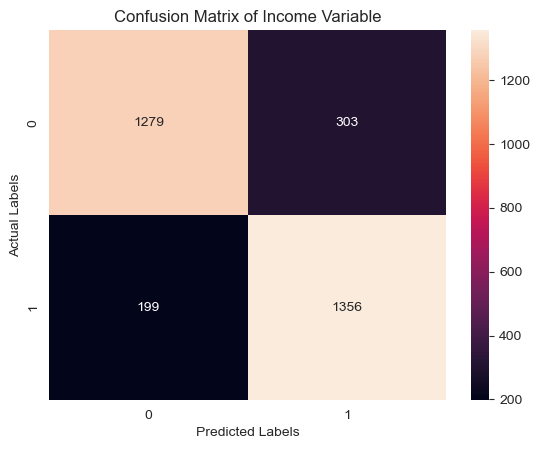

In [155]:
confusion_mat = confusion_matrix(y_true=Y_test, y_pred=Y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title('Confusion Matrix of Income Variable')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')